In [ ]:
import numpy as np
import os
from tqdm.notebook import tqdm

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Sound Processing
import librosa

# Training Data Preparation
from sklearn.model_selection import train_test_split

NUM_AUDIO_PER_ACTOR = 60
NUM_ACTORS = 24
FREQ_RANGE = 128
MAX_TIMESTEP = 228
NUM_EMOTIONS = 8
N_FFT = 2048
HOP_LENGTH = 512
EMOTIONS = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']

# # For creating data_X & data_y numpy arrays
# data_X = np.zeros((NUM_AUDIO_PER_ACTOR * NUM_ACTORS, MAX_TIMESTEP, FREQ_RANGE), dtype = np.float64)
# data_y = np.zeros((NUM_AUDIO_PER_ACTOR * NUM_ACTORS, NUM_EMOTIONS), dtype = np.uint8)
# actors_list = os.listdir('./Datasets/RAVDESS/')
# idx = 0
# for actor in tqdm(actors_list, total = NUM_ACTORS):
#     audio_list = os.listdir(f'./Datasets/RAVDESS/{actor}/')
#     emotion = [int(x.split('-')[2]) - 1 for x in audio_list]
#     for audio in audio_list:
#         audio_filename = f'./Datasets/RAVDESS/{actor}/{audio}'
#         y, sr = librosa.load(audio_filename)
#         spect = librosa.feature.melspectrogram(y = y, sr = sr, n_fft = N_FFT, hop_length = HOP_LENGTH)
#         spect = librosa.power_to_db(spect, ref = np.max)
#         data_X[idx, :spect.shape[1], :] = spect.transpose()
#         data_y[idx, :] = np.identity(NUM_EMOTIONS)[emotion[idx % NUM_AUDIO_PER_ACTOR]]
#         idx += 1
# with open('./Processed_Data/data_X.npy', 'wb') as save_file:
#     np.save(save_file, data_X)
# with open('./Processed_Data/data_y.npy', 'wb') as save_file:
#     np.save(save_file, data_y)

def get_train_val_split(X_filepath, y_filepath, train_perc = 75, val_perc = 10):
    
    with open(X_filepath, 'rb') as load_file:
        data_X = np.load(load_file)
    with open(y_filepath, 'rb') as load_file:
        data_y = np.load(load_file)
    
    def standardize(X):
        return (X - X.mean()) / (X.std() + 0.000001)
    data_X = standardize(data_X)
    
    test_perc = 100 - (train_perc + val_perc)
    train_val_X, test_X, train_val_y, test_y = train_test_split(data_X, data_y, test_size = test_perc / 100, stratify = np.argmax(data_y, axis = 1))
    train_X, val_X, train_y, val_y = train_test_split(train_val_X, train_val_y, test_size = val_perc / (train_perc + val_perc), stratify = np.argmax(train_val_y, axis = 1))
    return train_X, train_y, val_X, val_y, test_X, test_y

# # Sample Usage
# train_X, train_y, val_X, val_y, test_X, test_y = get_train_val_split(X_filepath = './Processed_Data/data_X.npy', y_filepath = './Processed_Data/data_y.npy')
# print(f"Shape of Train_X: {train_X.shape}")
# print(f"Shape of Train_X: {train_y.shape}")
# print(f"Shape of Train_X: {val_X.shape}")
# print(f"Shape of Train_X: {val_y.shape}")
# print(f"Shape of Train_X: {test_X.shape}")
# print(f"Shape of Train_X: {test_y.shape}")

In [ ]:
train_X, train_y, val_X, val_y, test_X, test_y=get_train_val_split('/content/drive/MyDrive/Processed_Data/Processed_Data/data_X.npy','/content/drive/MyDrive/Processed_Data/Processed_Data/data_y.npy')

In [ ]:
EMOTIONS = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
import keras as k
import pandas as pd
import numpy as np
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint



In [ ]:
# final frame 
model = Sequential()
model.add(Bidirectional(LSTM(228, return_sequences=True), input_shape=(228, 128)))
model.add(Bidirectional(LSTM(2*228)))
model.add(Dense(8))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)

In [ ]:
filepath='/content/drive/MyDrive/speech_emotion_recognition/bi-lstm-model-final-frame.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',save_weights_only=True, verbose=1, save_best_only=True, mode='max')
callbacks_list = [es,checkpoint]

In [ ]:
history = model.fit(train_X, train_y,
                    batch_size=32, epochs=100, validation_data=(val_X,val_y), verbose=1,callbacks=callbacks_list)

Epoch 1/100
34/34 [==============================] - 12s 149ms/step - loss: 2.4925 - accuracy: 0.1379 - val_loss: 2.1100 - val_accuracy: 0.1736

Epoch 00001: val_accuracy improved from -inf to 0.17361, saving model to /content/drive/MyDrive/speech_emotion_recognition/bi-lstm-model-final-frame.h5
Epoch 2/100
34/34 [==============================] - 4s 108ms/step - loss: 2.0971 - accuracy: 0.1303 - val_loss: 2.0733 - val_accuracy: 0.1319

Epoch 00002: val_accuracy did not improve from 0.17361
Epoch 3/100
34/34 [==============================] - 4s 108ms/step - loss: 2.0620 - accuracy: 0.1318 - val_loss: 2.0778 - val_accuracy: 0.1319

Epoch 00003: val_accuracy did not improve from 0.17361
Epoch 4/100
34/34 [==============================] - 4s 110ms/step - loss: 2.0689 - accuracy: 0.1494 - val_loss: 2.0740 - val_accuracy: 0.1111

Epoch 00004: val_accuracy did not improve from 0.17361
Epoch 5/100
34/34 [==============================] - 4s 110ms/step - loss: 2.0681 - accuracy: 0.1376 - val

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 228, 456)          651168    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 912)               3330624   
_________________________________________________________________
dense (Dense)                (None, 8)                 7304      
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
Total params: 3,989,096
Trainable params: 3,989,096
Non-trainable params: 0
_________________________________________________________________


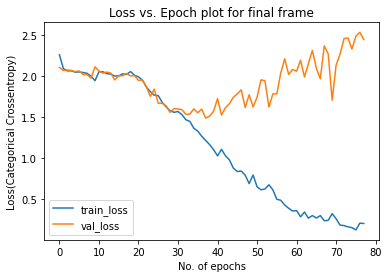

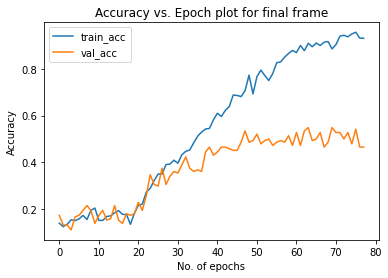

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '




Precision 0.5712364700380971
Recall 0.5344827586206897
Accuracy 0.5416666666666666
F1 0.536118421510849
jaccard 0.3754458323433561





In [ ]:
plt.plot(history.history['loss'] , label = 'train_loss')
plt.plot(history.history['val_loss'] , label = 'val_loss')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("Loss(Categorical Crossentropy)")
plt.title("Loss vs. Epoch plot for final frame")
plt.show()

plt.plot(history.history['accuracy'] , label = 'train_acc')
plt.plot(history.history['val_accuracy'] , label = 'val_acc')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epoch plot for final frame")
plt.show()



#print('original')
orig = np.argmax(test_y,axis=1) 
#print(orig)
#print('\n')
#print('predicted')
pred = model.predict_generator(test_X , steps = 32 , verbose = 0)
pred_class_indices = np.argmax(pred,axis=1)
#print(pred_class_indices)
#print('\n')
print('\n')
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score,jaccard_score,classification_report
print('Precision {}'.format(precision_score(y_true=orig, y_pred=pred_class_indices,average = 'macro')))
print('Recall {}'.format(recall_score(y_true=orig, y_pred=pred_class_indices,average='macro')))
print('Accuracy {}'.format(accuracy_score(y_true=orig, y_pred=pred_class_indices)))
print('F1 {}'.format(f1_score(y_true=orig, y_pred=pred_class_indices,average = 'macro')))
print('jaccard {}'.format(jaccard_score(y_true=orig, y_pred=pred_class_indices,average = 'macro')))
#print('confusion_matrix\n {}'.format(confusion_matrix(y_true=orig, y_pred=pred_class_indices)))
#print('classification_report\n {}'.format(classification_report(y_true=orig, y_pred=pred_class_indices)))
print('\n\n')


met = np.zeros((9,5))

avg_met = [precision_score(y_true=orig, y_pred=pred_class_indices,average = 'macro'),
           recall_score(y_true=orig, y_pred=pred_class_indices,average='macro'),
           f1_score(y_true=orig, y_pred=pred_class_indices,average = 'macro'),
           jaccard_score(y_true=orig, y_pred=pred_class_indices,average = 'macro'),
           accuracy_score(y_true=orig, y_pred=pred_class_indices)]

avg_met = np.array(avg_met)
avg_met.round(decimals=2)
met[8,:] = avg_met

#print(met)

In [ ]:
classes = [0,1,2,3,4,5,6,7]


for cl in classes:

    print("class: ",EMOTIONS[cl])

    a1 = np.uint8(orig == cl)
    a2 = np.uint8(pred_class_indices == cl)

    print('Accuracy {}'.format(accuracy_score(y_true=a1, y_pred=a2)))
    print('F1 {}'.format(f1_score(y_true=a1, y_pred=a2)))
    print('precision {}'.format(precision_score(y_true=a1, y_pred=a2)))
    print('recall {}'.format(recall_score(y_true=a1, y_pred=a2)))

    print('jaccard {}'.format(jaccard_score(y_true=a1, y_pred=a2)))
    print("_______________________________")


    class_met = [precision_score(y_true=a1, y_pred=a2),
                 recall_score(y_true=a1, y_pred=a2),
                 f1_score(y_true=a1, y_pred=a2),
                 jaccard_score(y_true=a1, y_pred=a2),
                 accuracy_score(y_true=a1, y_pred=a2)]

    class_met = np.array(class_met)
    class_met.round(decimals=2)
    met[cl,:] =class_met

class:  Neutral
Accuracy 0.9305555555555556
F1 0.4444444444444445
precision 0.46153846153846156
recall 0.42857142857142855
jaccard 0.2857142857142857
_______________________________
class:  Calm
Accuracy 0.9398148148148148
F1 0.7719298245614034
precision 0.7857142857142857
recall 0.7586206896551724
jaccard 0.6285714285714286
_______________________________
class:  Happy
Accuracy 0.8287037037037037
F1 0.41269841269841273
precision 0.38235294117647056
recall 0.4482758620689655
jaccard 0.26
_______________________________
class:  Sad
Accuracy 0.8287037037037037
F1 0.41269841269841273
precision 0.38235294117647056
recall 0.4482758620689655
jaccard 0.26
_______________________________
class:  Angry
Accuracy 0.9120370370370371
F1 0.5581395348837208
precision 0.8571428571428571
recall 0.41379310344827586
jaccard 0.3870967741935484
_______________________________
class:  Fearful
Accuracy 0.8796296296296297
F1 0.48000000000000004
precision 0.5714285714285714
recall 0.41379310344827586
jaccard 0

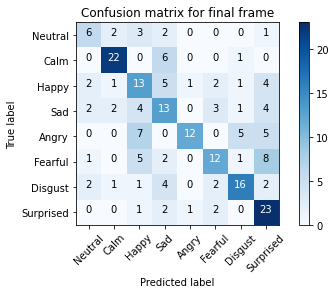

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=orig, y_pred=pred_class_indices)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # if normalize:
    #     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     print("Normalized confusion matrix")
    # else:
    #     print('Confusion matrix, without normalization')

    # print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, EMOTIONS,
                        normalize=False,
                        title='Confusion matrix for final frame',
                        cmap=plt.cm.Blues)

In [ ]:
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, concatenate

In [ ]:
## frame wise
model = Sequential()
model.add(Bidirectional(LSTM(228, return_sequences=True), input_shape=(228, 128)))
model.add(Bidirectional(LSTM(2*228,return_sequences=True)))
#model.add(TimeDistributed(Dense(8, activation="relu")))
model.add(tf.keras.layers.Flatten())
#model.add(Dense(8))
#model.add(Dense(256))
#model.add(Dense(64))
#model.add(Dense(32))
model.add(Dense(8))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_75 (Bidirectio (None, 228, 456)          651168    
_________________________________________________________________
bidirectional_76 (Bidirectio (None, 228, 912)          3330624   
_________________________________________________________________
flatten_3 (Flatten)          (None, 207936)            0         
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 1663496   
_________________________________________________________________
activation_19 (Activation)   (None, 8)                 0         
Total params: 5,645,288
Trainable params: 5,645,288
Non-trainable params: 0
_________________________________________________________________


In [ ]:
filepath='/content/drive/MyDrive/speech_emotion_recognition/bi-lstm-model-frame-wise.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',save_weights_only=True, verbose=1, save_best_only=True, mode='max')
callbacks_list = [es,checkpoint]

In [ ]:
history=model.fit(train_X, train_y,
                    batch_size=32, epochs=100, validation_data=(val_X,val_y), verbose=1,callbacks=callbacks_list)

Epoch 1/100
34/34 [==============================] - 10s 148ms/step - loss: 8.7026 - accuracy: 0.1822 - val_loss: 1.8912 - val_accuracy: 0.4028

Epoch 00001: val_accuracy improved from -inf to 0.40278, saving model to /content/drive/MyDrive/speech_emotion_recognition/bi-lstm-model-frame-wise.h5
Epoch 2/100
34/34 [==============================] - 4s 114ms/step - loss: 1.6186 - accuracy: 0.4230 - val_loss: 1.3661 - val_accuracy: 0.5347

Epoch 00002: val_accuracy improved from 0.40278 to 0.53472, saving model to /content/drive/MyDrive/speech_emotion_recognition/bi-lstm-model-frame-wise.h5
Epoch 3/100
34/34 [==============================] - 4s 115ms/step - loss: 1.0262 - accuracy: 0.6200 - val_loss: 1.4988 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.53472
Epoch 4/100
34/34 [==============================] - 4s 116ms/step - loss: 0.8085 - accuracy: 0.7213 - val_loss: 1.2321 - val_accuracy: 0.5694

Epoch 00004: val_accuracy improved from 0.53472 to 0.56944, sav

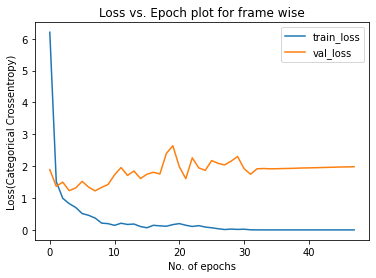

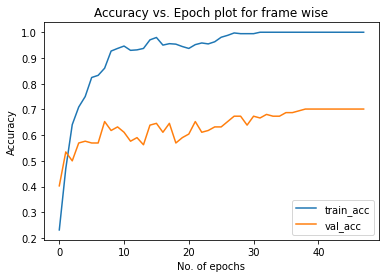

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '




Precision 0.6962405817503269
Recall 0.6910406403940887
Accuracy 0.6990740740740741
F1 0.6898777498610646
jaccard 0.5322452868698999





In [ ]:
plt.plot(history.history['loss'] , label = 'train_loss')
plt.plot(history.history['val_loss'] , label = 'val_loss')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("Loss(Categorical Crossentropy)")
plt.title("Loss vs. Epoch plot for frame wise")
plt.show()

plt.plot(history.history['accuracy'] , label = 'train_acc')
plt.plot(history.history['val_accuracy'] , label = 'val_acc')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epoch plot for frame wise")
plt.show()



#print('original')
orig = np.argmax(test_y,axis=1) 
#print(orig)
#print('\n')
#print('predicted')
pred = model.predict_generator(test_X , steps = 32 , verbose = 0)
pred_class_indices = np.argmax(pred,axis=1)
#print(pred_class_indices)
#print('\n')
print('\n')
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score,jaccard_score,classification_report
print('Precision {}'.format(precision_score(y_true=orig, y_pred=pred_class_indices,average = 'macro')))
print('Recall {}'.format(recall_score(y_true=orig, y_pred=pred_class_indices,average='macro')))
print('Accuracy {}'.format(accuracy_score(y_true=orig, y_pred=pred_class_indices)))
print('F1 {}'.format(f1_score(y_true=orig, y_pred=pred_class_indices,average = 'macro')))
print('jaccard {}'.format(jaccard_score(y_true=orig, y_pred=pred_class_indices,average = 'macro')))
#print('confusion_matrix\n {}'.format(confusion_matrix(y_true=orig, y_pred=pred_class_indices)))
#print('classification_report\n {}'.format(classification_report(y_true=orig, y_pred=pred_class_indices)))
print('\n\n')


met = np.zeros((9,5))

avg_met = [precision_score(y_true=orig, y_pred=pred_class_indices,average = 'macro'),
           recall_score(y_true=orig, y_pred=pred_class_indices,average='macro'),
           f1_score(y_true=orig, y_pred=pred_class_indices,average = 'macro'),
           jaccard_score(y_true=orig, y_pred=pred_class_indices,average = 'macro'),
           accuracy_score(y_true=orig, y_pred=pred_class_indices)]

avg_met = np.array(avg_met)
avg_met.round(decimals=2)
met[8,:] = avg_met

#print(met)

In [ ]:
classes = [0,1,2,3,4,5,6,7]


for cl in classes:

    print("class: ",EMOTIONS[cl])

    a1 = np.uint8(orig == cl)
    a2 = np.uint8(pred_class_indices == cl)

    print('Accuracy {}'.format(accuracy_score(y_true=a1, y_pred=a2)))
    print('F1 {}'.format(f1_score(y_true=a1, y_pred=a2)))
    print('precision {}'.format(precision_score(y_true=a1, y_pred=a2)))
    print('recall {}'.format(recall_score(y_true=a1, y_pred=a2)))

    print('jaccard {}'.format(jaccard_score(y_true=a1, y_pred=a2)))
    print("_______________________________")


    class_met = [precision_score(y_true=a1, y_pred=a2),
                 recall_score(y_true=a1, y_pred=a2),
                 f1_score(y_true=a1, y_pred=a2),
                 jaccard_score(y_true=a1, y_pred=a2),
                 accuracy_score(y_true=a1, y_pred=a2)]

    class_met = np.array(class_met)
    class_met.round(decimals=2)
    met[cl,:] =class_met

class:  Neutral
Accuracy 0.9490740740740741
F1 0.5925925925925927
precision 0.6153846153846154
recall 0.5714285714285714
jaccard 0.42105263157894735
_______________________________
class:  Calm
Accuracy 0.9259259259259259
F1 0.7419354838709677
precision 0.696969696969697
recall 0.7931034482758621
jaccard 0.5897435897435898
_______________________________
class:  Happy
Accuracy 0.9259259259259259
F1 0.6923076923076923
precision 0.782608695652174
recall 0.6206896551724138
jaccard 0.5294117647058824
_______________________________
class:  Sad
Accuracy 0.8796296296296297
F1 0.5185185185185185
precision 0.56
recall 0.4827586206896552
jaccard 0.35
_______________________________
class:  Angry
Accuracy 0.9398148148148148
F1 0.7636363636363636
precision 0.8076923076923077
recall 0.7241379310344828
jaccard 0.6176470588235294
_______________________________
class:  Fearful
Accuracy 0.9351851851851852
F1 0.7586206896551724
precision 0.7586206896551724
recall 0.7586206896551724
jaccard 0.611111111

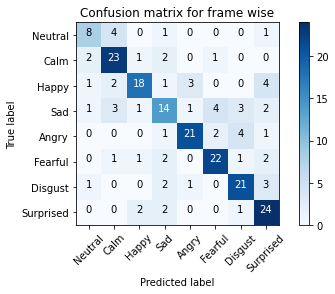

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=orig, y_pred=pred_class_indices)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # if normalize:
    #     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     print("Normalized confusion matrix")
    # else:
    #     print('Confusion matrix, without normalization')

    # print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, EMOTIONS,
                        normalize=False,
                        title='Confusion matrix for frame wise',
                        cmap=plt.cm.Blues)